# Analis Exploratorio de Datos

A continuación se realizara un analisis exploratorio de la base de datos de Internet Movie Database donde es esta lista de las 1000 peliculas mejor calificadas.

El propósito es preparar los datos para un análisis exploratorio que permita entender las tendencias más relevantes del cine, como las calificaciones, géneros, directores y desempeño económico.

## Importar Librerias

En Este paso se importan las librerias necesarias para el analisis de datos y la visualización, asi como la base de datos que contiene información detallada sobre cada película, incluyendo título, año de lanzamiento, calificación, género, duración, director, entre otros.

In [2]:
%pip install pandas numpy matplotlib seaborn

## Limpieza de Datos

Se procede a cargar el dataset que contiene la información sobre las 1000 peliculas; para posteriormente realizar un analisis de la estructura de los tipos de datos y su adecuada limpieza y organización. En esta parte se corrigen errores de formato (por ejemplo, convertir columnas numéricas de texto a número) y se eliminan símbolos innecesarios como $, comas o unidades de medida.

In [3]:
import pandas as pd 
pd.set_option('display.float_format', '{:.0f}'.format)
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Analisis Descriptivo

In [4]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [6]:
df['Runtime']= df['Runtime'].str.replace(' min','').astype(int)  
df['Gross']=df['Gross'].str.replace('$','').str.replace(',','').astype(float) 
df['No_of_Votes']=df['No_of_Votes'].astype(int)  
df['Released_Year']=df['Released_Year'].astype(object) 
df['Genre'] = df['Genre'].str.split().str[0]
df['Genre'] = df['Genre'].str.split().str[0].str.replace(',', '', regex=False)

In [7]:
df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000,1000,843,1000,831
mean,123,8,78,273693,68034751
std,28,0,12,327373,109750043
min,45,8,28,25088,1305
25%,103,8,70,55526,3253559
50%,119,8,79,138548,23530892
75%,137,8,87,374161,80750894
max,321,9,100,2343110,936662225


In [8]:
df=df.dropna() 
df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,714,714,714,714,714
mean,124,8,77,356135,78513585
std,26,0,12,353901,114977950
min,72,8,28,25229,1305
25%,104,8,70,96010,6157408
50%,120,8,78,236602,34850146
75%,136,8,86,507792,102464067
max,238,9,100,2343110,936662225


In [9]:
df['Genre'].value_counts() 


Genre
Drama        192
Action       127
Comedy       104
Crime         74
Biography     73
Animation     63
Adventure     58
Horror         9
Mystery        7
Western        4
Family         2
Film-Noir      1
Name: count, dtype: int64

In [10]:
df['Released_Year'].value_counts()

Released_Year
2014    28
2004    27
2001    24
2009    23
2013    22
        ..
1941     1
1931     1
1936     1
1942     1
1953     1
Name: count, Length: 83, dtype: int64

# Top 5 peliculas por Recaudación

Se hace un analisi de las peliculas más taquilleras dentro del listado de las 1000 peliculas, encontrando, de este modo, titulos muy reconocidos a nivel mundial.


Las 5 películas más taquilleras son:
1. Star Wars: Episode VII - The Force Awakens (2015) - $936,662,225
2. Avengers: Endgame (2019) - $858,373,000
3. Avatar (2009) - $760,507,625
4. Avengers: Infinity War (2018) - $678,815,482
5. Titanic (1997) - $659,325,379


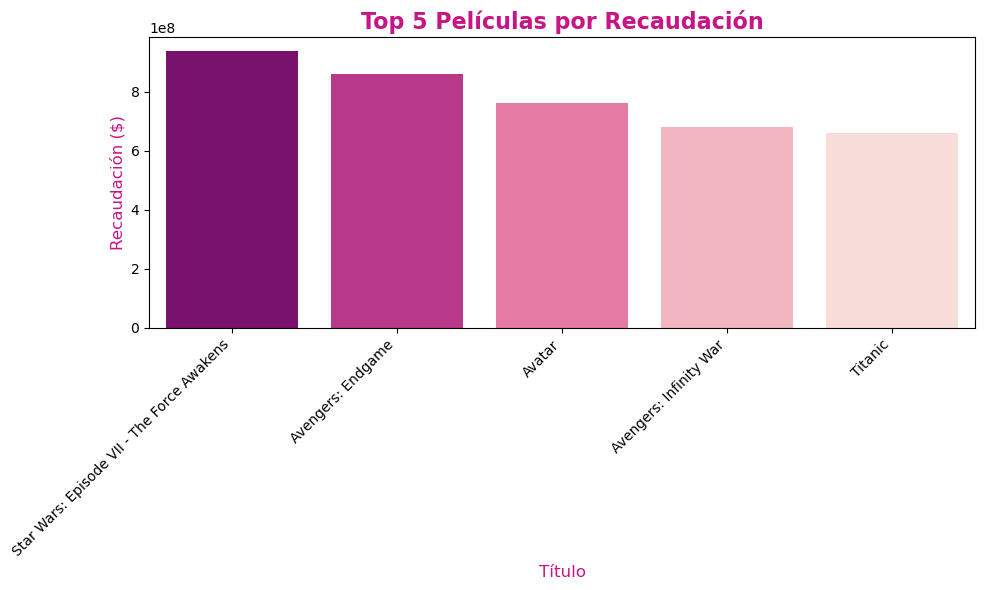

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar y seleccionar las 5 primeras por Gross
top5 = df.sort_values(by='Gross', ascending=False).head(5)
print("\nLas 5 películas más taquilleras son:")
for idx, row in enumerate(top5.itertuples(), 1):
    print(f"{idx}. {row.Series_Title} ({row.Released_Year}) - ${row.Gross:,.0f}")

plt.figure(figsize=(10, 6))
sns.barplot(data=top5, x='Series_Title', y='Gross', hue='Series_Title', legend=False, palette='RdPu_r')
plt.title('Top 5 Películas por Recaudación', fontsize=16, fontweight='bold', color='#C71585')
plt.xlabel('Título', fontsize=12, color='#C71585')
plt.ylabel('Recaudación ($)', fontsize=12, color='#C71585')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Permite ver si existe relación entre la popularidad económica y la valoración crítica.

# Top 10 Generos Más Frecuentes

Se agrupan las películas por el campo Genre y se cuentan cuántas pertenecen a cada categoría.


Frecuencia de géneros:
Genre
Drama        192
Action       127
Comedy       104
Crime         74
Biography     73
Animation     63
Adventure     58
Horror         9
Mystery        7
Western        4
Family         2
Film-Noir      1
Name: count, dtype: int64


C:\Users\crica\AppData\Local\Temp\ipykernel_1428\4086218582.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='PiYG_r')


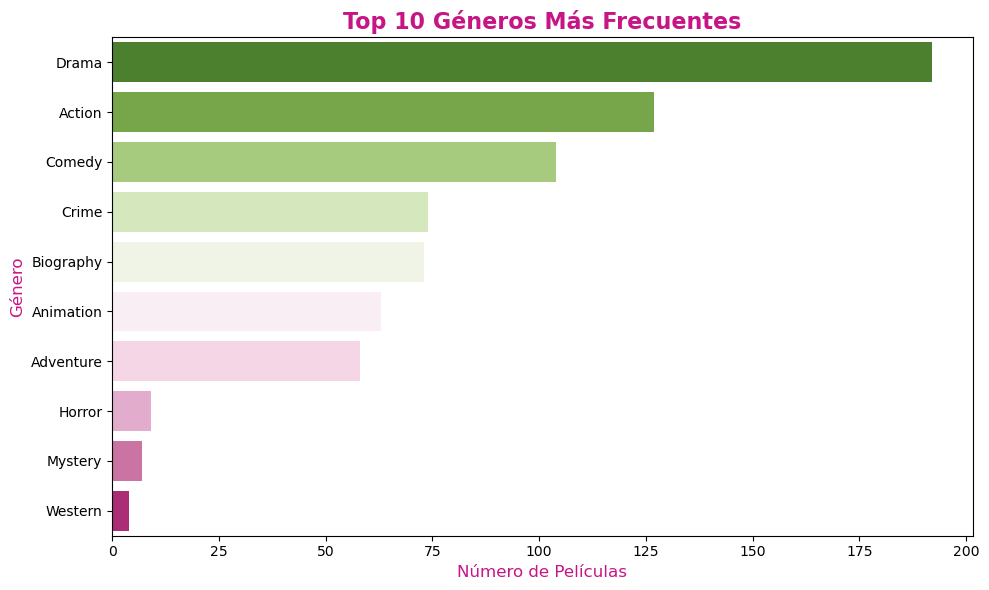

In [12]:
genre_counts = df['Genre'].value_counts()
print("\nFrecuencia de géneros:")
print(genre_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='PiYG_r')
plt.title('Top 10 Géneros Más Frecuentes', fontsize=16, fontweight='bold', color='#C71585')
plt.xlabel('Número de Películas', fontsize=12, color='#C71585')
plt.ylabel('Género', fontsize=12, color='#C71585')
plt.tight_layout()
plt.show()

- El género Drama suele ser el más frecuente entre las películas mejor calificadas.
- Los géneros con menor representación pueden pertenecer a nichos más específicos o tener menor audiencia como las peliculas navideñas entro otros generos.

# Directores

Se identifican los directores con más películas en el top 1000, agrupando y contando sus apariciones.


Top 10 directores con más películas en el ranking:
 1. Steven Spielberg: 13 películas
 2. Martin Scorsese: 10 películas
 3. Alfred Hitchcock: 9 películas
 4. Christopher Nolan: 8 películas
 5. Clint Eastwood: 8 películas
 6. Quentin Tarantino: 8 películas
 7. David Fincher: 8 películas
 8. Hayao Miyazaki: 7 películas
 9. Rob Reiner: 7 películas
10. Woody Allen: 7 películas

Análisis detallado de los 5 directores más prolíficos:
                   Rating Promedio  Recaudación Promedio  Num. Películas
Director                                                                
Steven Spielberg                 8             190625628              13
Martin Scorsese                  8              53831920              10
Alfred Hitchcock                 8              13234378               9
Christopher Nolan                8             242181763               8
Clint Eastwood                   8              74086580               8

✓ Director con mejor rating promedio: Christopher Nolan

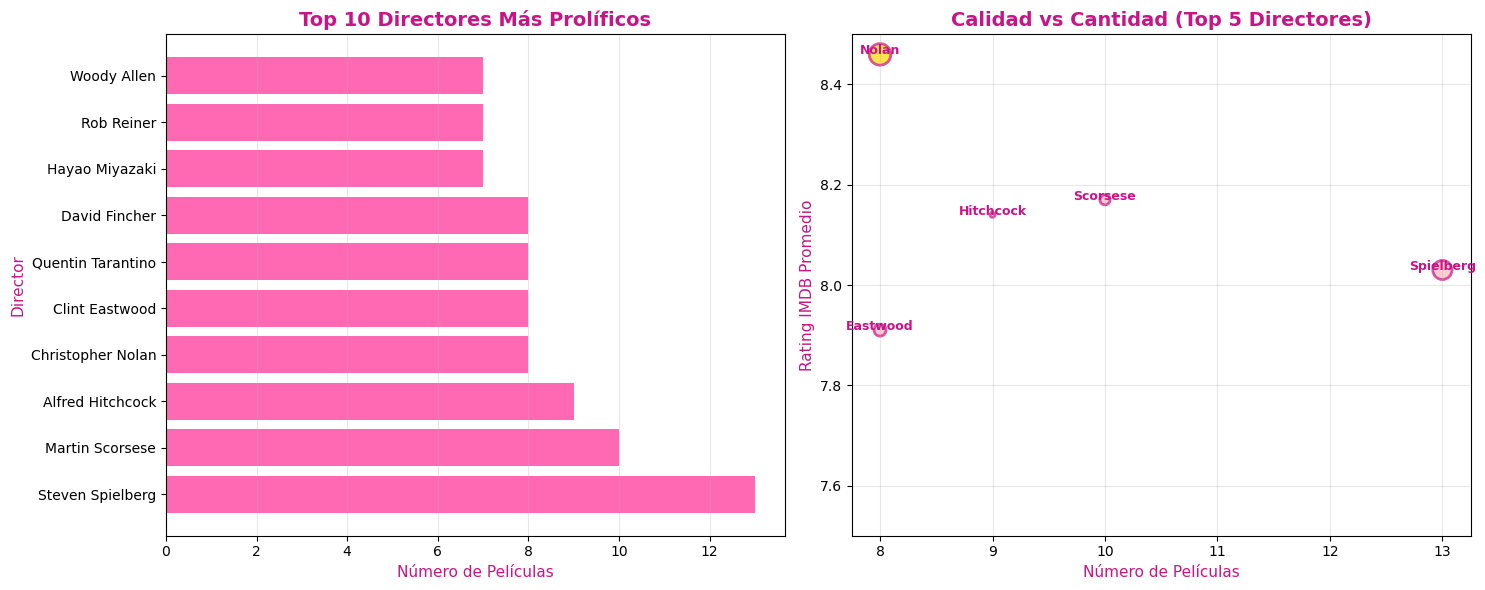

In [13]:
# Top 10 directores por cantidad de películas
top_directors = df['Director'].value_counts().head(10)
print("\nTop 10 directores con más películas en el ranking:")
for idx, (director, count) in enumerate(top_directors.items(), 1):
    print(f"{idx:2d}. {director}: {count} películas")

# Análisis detallado de top 5 directores
top5_directors = top_directors.head(5).index
director_analysis = df[df['Director'].isin(top5_directors)].groupby('Director').agg({
    'IMDB_Rating': 'mean',
    'Gross': 'mean',
    'Series_Title': 'count'
}).round(2)
director_analysis.columns = ['Rating Promedio', 'Recaudación Promedio', 'Num. Películas']
director_analysis = director_analysis.sort_values('Num. Películas', ascending=False)

print("\nAnálisis detallado de los 5 directores más prolíficos:")
print(director_analysis)

# Identificar al director más exitoso
mejor_director = director_analysis['Rating Promedio'].idxmax()
print(f"\n✓ Director con mejor rating promedio: {mejor_director}")
print(f"  ({director_analysis.loc[mejor_director, 'Rating Promedio']:.2f} puntos IMDB)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Número de películas por director
axes[0].barh(top_directors.head(10).index, top_directors.head(10).values, color='#FF69B4')
axes[0].set_title('Top 10 Directores Más Prolíficos', fontsize=14, fontweight='bold', color='#C71585')
axes[0].set_xlabel('Número de Películas', fontsize=11, color='#C71585')
axes[0].set_ylabel('Director', fontsize=11, color='#C71585')
axes[0].grid(axis='x', alpha=0.3)

# Gráfico 2: Rating promedio vs Número de películas (Top 5)
colors = ['#FFD700' if director == mejor_director else '#FFB6C1' for director in director_analysis.index]
axes[1].scatter(director_analysis['Num. Películas'], 
               director_analysis['Rating Promedio'],
               s=director_analysis['Recaudación Promedio']/1e6,  # Tamaño por recaudación
               c=colors, alpha=0.7, edgecolors='#C71585', linewidth=2)

for director in director_analysis.index:
    axes[1].annotate(director.split()[-1],  # Solo apellido
                    (director_analysis.loc[director, 'Num. Películas'],
                     director_analysis.loc[director, 'Rating Promedio']),
                    fontsize=9, ha='center', color='#C71585', fontweight='bold')

axes[1].set_title('Calidad vs Cantidad (Top 5 Directores)', fontsize=14, fontweight='bold', color='#C71585')
axes[1].set_xlabel('Número de Películas', fontsize=11, color='#C71585')
axes[1].set_ylabel('Rating IMDB Promedio', fontsize=11, color='#C71585')
axes[1].grid(alpha=0.3)
axes[1].set_ylim(7.5, 8.5)

plt.tight_layout()
plt.show()


- Directores como Christopher Nolan, Steven Spielberg o Martin Scorsese suelen tener múltiples obras destacadas.
- Esto permite reconocer a los directores más influyentes en el cine

# Calidad

In [14]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Paleta de colores rosa personalizada
pink_palette = ['#FFB6C1', '#FF69B4', '#FF1493', '#C71585', '#DB7093']
pink_cmap = sns.blend_palette(pink_palette, as_cmap=True)

In [19]:
print("\n TOP 5 PELÍCULAS MÁS VOTADAS:")
print("-"*60)
top5_votes = df.nlargest(5, 'No_of_Votes')[['Series_Title', 'No_of_Votes', 'IMDB_Rating', 'Released_Year']]
for idx, row in top5_votes.iterrows():
    print(f"{row['Series_Title']} ({row['Released_Year']})")
    print(f"   Votos: {row['No_of_Votes']:,.0f} | Rating: {row['IMDB_Rating']}")



 TOP 5 PELÍCULAS MÁS VOTADAS:
------------------------------------------------------------
The Shawshank Redemption (1994)
   Votos: 2,343,110 | Rating: 9.3
The Dark Knight (2008)
   Votos: 2,303,232 | Rating: 9.0
Inception (2010)
   Votos: 2,067,042 | Rating: 8.8
Fight Club (1999)
   Votos: 1,854,740 | Rating: 8.8
Pulp Fiction (1994)
   Votos: 1,826,188 | Rating: 8.9


c:\Users\crica\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  func(*args, **kwargs)
c:\Users\crica\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


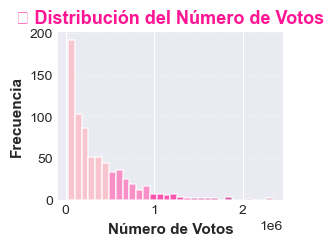

In [16]:
ax3 = plt.subplot(2, 2, 3)
n, bins, patches = ax3.hist(df['No_of_Votes'], bins=30, color='#FF69B4', 
                            alpha=0.7, edgecolor='white', linewidth=1.2)
# Gradiente de color para el histograma
for i, patch in enumerate(patches):
    patch.set_facecolor(pink_palette[min(i*len(pink_palette)//len(patches), len(pink_palette)-1)])
ax3.set_xlabel('Número de Votos', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
ax3.set_title('📈 Distribución del Número de Votos', fontsize=13, fontweight='bold', color='#FF1493')
ax3.grid(True, alpha=0.3, axis='y', linestyle='--')


- La mayoría de las películas del top presentan puntuaciones entre 7 y 9.

- No hay grandes desviaciones, lo que confirma una selección de títulos de alta calidad.

# Top 10 Peliculas más Votadas

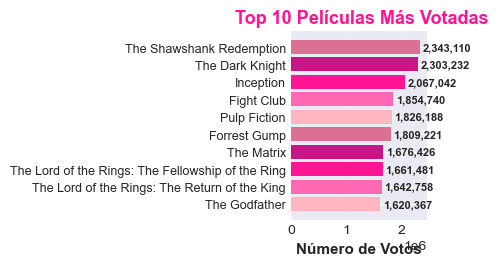

In [21]:
# 4. BARRAS HORIZONTALES: Top 10 más votadas
ax4 = plt.subplot(2, 2, 4)
top10 = df.nlargest(10, 'No_of_Votes')[['Series_Title', 'No_of_Votes']].sort_values('No_of_Votes')
bars = ax4.barh(range(len(top10)), top10['No_of_Votes'].values, color=pink_palette)
ax4.set_yticks(range(len(top10)))
ax4.set_yticklabels(top10['Series_Title'].values, fontsize=9)
ax4.set_xlabel('Número de Votos', fontsize=11, fontweight='bold')
ax4.set_title(' Top 10 Películas Más Votadas', fontsize=13, fontweight='bold', color='#FF1493')
ax4.grid(True, alpha=0.3, axis='x', linestyle='--')

# Añadir valores en las barras
for i, (bar, val) in enumerate(zip(ax4.patches, top10['No_of_Votes'].values)):
    ax4.text(val + 50000, bar.get_y() + bar.get_height()/2, 
            f'{val:,.0f}', va='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()


La producción de películas ha aumentado con el tiempo. Sin embargo, muchas películas antiguas siguen manteniendo calificaciones muy altas.

# Duración de la Pelicula


Estadísticas de duración (minutos):
  Mínima: 72
  Máxima: 238
  Promedio: 124
  Mediana: 120

Análisis por categoría de duración:
              Rating Promedio  Recaudación Promedio  Cantidad
Duracion_Cat                                                 
Corta                       8              59160188        41
Media                       8              61392754       321
Larga                       8              94256052       326
Muy Larga                   8             123022506        26


C:\Users\crica\AppData\Local\Temp\ipykernel_1428\2703472051.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duracion_stats = df.groupby('Duracion_Cat').agg({


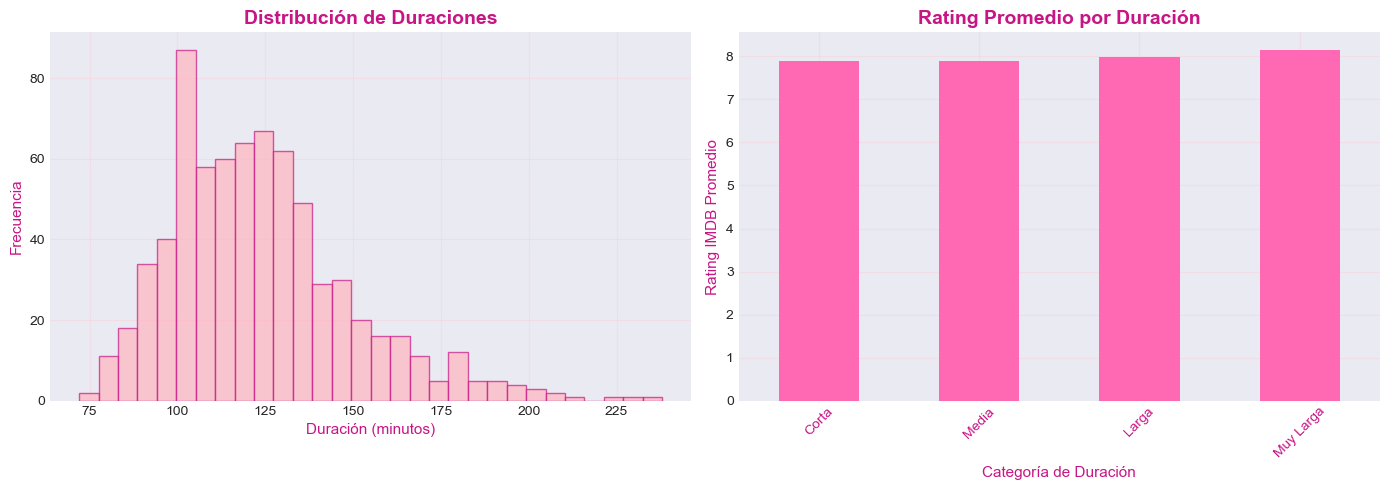

In [18]:
print(f"\nEstadísticas de duración (minutos):")
print(f"  Mínima: {df['Runtime'].min()}")
print(f"  Máxima: {df['Runtime'].max()}")
print(f"  Promedio: {df['Runtime'].mean():.0f}")
print(f"  Mediana: {df['Runtime'].median():.0f}")

# Categorizar duraciones
df['Duracion_Cat'] = pd.cut(df['Runtime'], 
                             bins=[0, 90, 120, 180, 400],
                             labels=['Corta', 'Media', 'Larga', 'Muy Larga'])

duracion_stats = df.groupby('Duracion_Cat').agg({
    'IMDB_Rating': 'mean',
    'Gross': 'mean',
    'Series_Title': 'count'
}).round(2)
duracion_stats.columns = ['Rating Promedio', 'Recaudación Promedio', 'Cantidad']

print("\nAnálisis por categoría de duración:")
print(duracion_stats)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de duraciones
axes[0].hist(df['Runtime'], bins=30, edgecolor='#C71585', alpha=0.7, color='#FFB6C1')
axes[0].set_title('Distribución de Duraciones', fontsize=14, fontweight='bold', color='#C71585')
axes[0].set_xlabel('Duración (minutos)', fontsize=11, color='#C71585')
axes[0].set_ylabel('Frecuencia', fontsize=11, color='#C71585')
axes[0].grid(alpha=0.3, color='#FFC0CB')

# Rating promedio por categoría
duracion_stats['Rating Promedio'].plot(kind='bar', ax=axes[1], color='#FF69B4')
axes[1].set_title('Rating Promedio por Duración', fontsize=14, fontweight='bold', color='#C71585')
axes[1].set_xlabel('Categoría de Duración', fontsize=11, color='#C71585')
axes[1].set_ylabel('Rating IMDB Promedio', fontsize=11, color='#C71585')
axes[1].tick_params(axis='x', rotation=45, colors='#C71585')
axes[1].grid(alpha=0.3, color='#FFC0CB')

plt.tight_layout()
plt.show()

Existe una correlación positiva moderada entre la calificación de IMDB y el puntaje de Metacritic. La recaudación no siempre está ligada a una alta calificación crítica.

## Conclusiones

El análisis descriptivo reveló que la mayoría de las películas del top presentan calificaciones entre 7.0 y 9.0, lo que evidencia un alto nivel de calidad general. Asimismo, se observó que la duración promedio ronda los 120 minutos, lo cual coincide con el estándar de producciones cinematográficas de gran impacto.

Al estudiar la distribución por género, se identificó que el Drama es el más frecuente dentro del ranking, seguido por Acción y Comedia, lo que demuestra la preferencia del público y la crítica por historias con profundidad emocional o contenido narrativo complejo. En cuanto a los directores, nombres como Christopher Nolan, Steven Spielberg y Martin Scorsese aparecen de forma recurrente, reflejando su influencia y consistencia en la industria.

El análisis de la distribución de calificaciones mostró que la mayoría de los títulos mantienen puntajes altos y poca dispersión, mientras que el estudio de la recaudación bruta (Gross) evidenció que el éxito económico no siempre está vinculado con la valoración crítica: existen películas altamente taquilleras con calificaciones promedio, así como producciones muy valoradas que no fueron éxitos comerciales.

En la dimensión temporal, el análisis por año de lanzamiento indicó un incremento sostenido en la producción de películas en las últimas décadas, aunque los clásicos antiguos conservan posiciones destacadas en los rankings, lo que resalta su vigencia e impacto cultural. Finalmente, las correlaciones entre variables permitieron observar una relación positiva entre las calificaciones de IMDB y los puntajes de Metacritic, mientras que la recaudación mostró una correlación más débil, confirmando que la calidad percibida por la crítica y el éxito financiero responden a factores distintos.